# Tutorial #11: nD Arrays and Vizualization 

# Part 1

Let's make a function that takes an x and y position and outputs z from this equations 

$z(x,y) = \frac{1}{2\pi\sigma_1^2}e^{-((x - 1)^2 + (y - 2)^2)/(2*\sigma_1^2)}  + \frac{1}{2\pi\sigma_2^2}e^{-((x + 2)^2 + (y + 3)^2)/(2*\sigma_2^2)} $

where we'll set $\sigma_1$ = 1.5 and $\sigma_2$ = 2.5

This is the sum of two 2D Normal Distributions centered at 2 different locations and with 2 different standard deviations

In [235]:
import numpy as np

def z(x,y):
    sigma_1 = 1.5
    sigma_2 = 2.5
    z_xy = ((2*np.pi*sigma_1)**-1)*np.exp(-((x-1)**2+(y-2)**2)/(2*sigma_1**2)) \
      + ((2*np.pi*sigma_2)**-1)*np.exp(-((x+2)**2+(y+3)**2)/(2*sigma_2**2))
    return z_xy

Now let's create a grid of x and y positions. We can do this like we did during today's lecture by first creating 2 1D arrays then using np.meshgrid() to convert those into a grid

Have the positions run from -10 to 10 and have a length of 101. 

In [236]:
x_range = np.linspace(-10,10,101)
y_range = np.linspace(-10,10,101)
x_grid, y_grid = np.meshgrid(x_range, y_range)

Next, let's calculate z using our function at our grid of x,y positions. 

In [237]:
z_grid = z(x_grid, y_grid)

Now, let's plot out z(x,y) using the imshow function. Give a correct extent so that the x and y axes are the correct values. 

Include a colorbar 

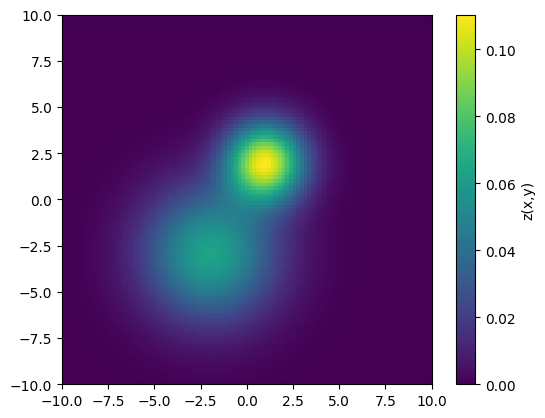

In [238]:
import matplotlib.pyplot as plt
from matplotlib import cm

extent = [x_grid.min(), x_grid.max(), y_grid.min(), y_grid.max()]

plt.imshow(z_grid, extent=extent, origin='lower')
plt.colorbar(label='z(x,y)')

Next, plot the same thing but this time as a contour plot. Give 10 levels for the contours that are within a reasonable range to show the behavior of the 2D function. Chose the color(s) and linestyle for your contours. 

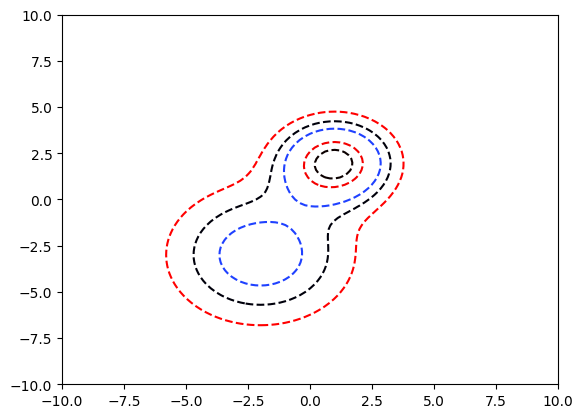

In [239]:
levels = np.linspace(0.02,0.16,10)
plt.contour(x_grid, y_grid, z_grid, extent=extent, levels=levels, cmap=cm.flag, linestyles='--')

Finally, plot z(x,y) again using the imshow function. This time, make the color scale logarithmic and choose a colormap. 

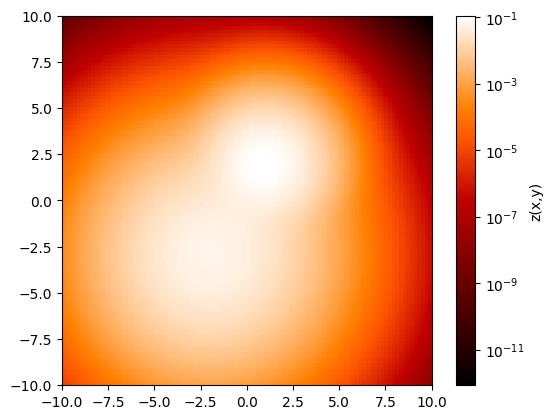

In [240]:
from matplotlib.colors import LogNorm
plt.imshow(z_grid, extent=extent, origin='lower', cmap=cm.gist_heat, norm=LogNorm())
plt.colorbar(label='z(x,y)')


# Part 2

Read in the same image we used in today's lecture. 

In [241]:
# you can do this 

import requests
from io import BytesIO
import matplotlib.pyplot as plt

with requests.get('https://static.sniffspot.com/packs/img/dog-pool-581.ebe279a8c368d609.png') as response:
    image = plt.imread(BytesIO(response.content))


In [242]:
# or this if you've aleady downloaded it using the wget command during lecture

#image = plt.imread('STScI-01EVVBEMGZCVS2PFV8DP9ZX5R8.png')

Remember from the lecture that the third axis specifies which color 

display the image with imshow()

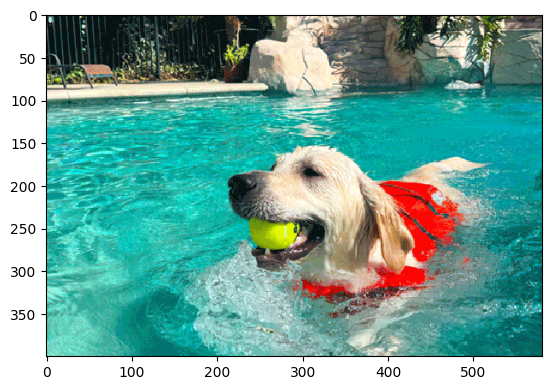

In [243]:
plt.imshow(image)

Find the shape of the image

In [244]:
image.shape


(400, 581, 4)

Find the mean red, green, and blue values over the whole image

In [245]:
mean_r = np.mean(image[:,:,0])
mean_g = np.mean(image[:,:,1])
mean_b = np.mean(image[:,:,2])

Now, let's try to pick out certain pixels in the image. 

Let's try to find where the reddest pixels are. 

We can do this by creating a boolean array that is True where the red value is greater than 0.9, while the green and blue values are less than 0.1. 

Then we can use the np.where() functions to find where in the image those pixels are. 

In [246]:
# Make your boolean array here
bool_array = np.zeros((image.shape[0], image.shape[1]), dtype=bool)
for i in range(image.shape[0] - 1):
    for j in range(image.shape[1] - 1):
        if image[i,j,0] > 0.9 and image[i,j,1] < 0.1 and image[i,j,2] < 0.1:
            bool_array[i,j] = True
        else:
            bool_array[i,j] = False


# use np.where to get the indexes
# for some reason np.where returns these out of order
yinds, xinds = np.where(bool_array)

Next, let's plot where these very red pixels are and see if it makes sense

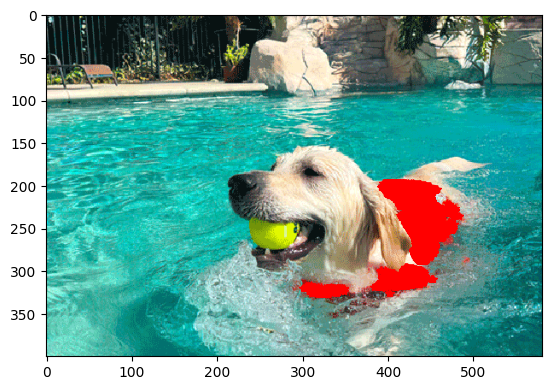

In [247]:
# plot the image
plt.imshow(image)

# plot where the indexes are as stars 
plt.plot(xinds, yinds, '*', color='r')

Bonus (not graded): Try to change the color of these very red pixels. Make a copy of image and edit values at the very red indexes and try to make them very blue or very green

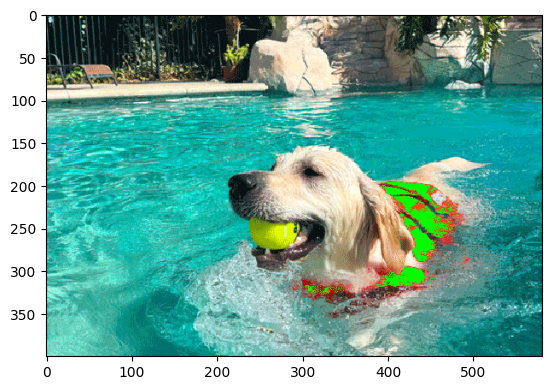

In [248]:
#Make the red pixels green
img_copy = image.copy()

# Swap the brightness of green and red channels for the very red pixels
img_copy[yinds, xinds, 0] = image[yinds, xinds, 1]  # Set red channel to original green value
img_copy[yinds, xinds, 1] = image[yinds, xinds, 0]  # Set green channel to original red value

plt.imshow(img_copy)